# Project 3: Web APIs & Classification

## Problem Statement

Nvidia is the top player in Garphic processors and AMD is trying to penetrate to gain market share in GPU. Data Science team at Nvidia keeps a track of reviews and comments across various social platforms, including Reddit post of Amd and Nvidia. The database keeps Nvidia product managers updated on what consumers are currently interested in. However, some internal system  failure caused the data of posts to get mixed up and loose the classification.

Nvidia Data science team had been given a task to classify Reddit posts of r/Nvidia and r/Amd. Natural Language Processing (NLP) and classification models, mainly Logistic Regression and Naive Bayes were used to make the binary classification. The final model will be selected based on the accuracy and ROC AUC scores. The model choosen achieved an accuracy of 0.89 and AUC of 0.88 and. This is crucial as the product managers need to know what people are discussing on both the subreddits.

Besides aiming for accuracy of our prediction, we wanted to target whether there are discussions around Amd or Nvidia so we can define the success that is evaluated by the model which has the highest score that combines both accuracy and ROC AUC scores.

## Executive Summary¶

Using Reddit's API, we will be scraping posts through the subreddits of Nvidia and AMD using the 'requests' library. We used a for loop to extract posts via json and gave a randomised sleep(helps server to not overload) duration between each loop. 

After examining the scrapped data, we see that the posts selftext and the title both hold meaningful words for our analysis. We cleaned the posts by dropping the empty selftext and duplicate post.We will do pre-processing of post and EDA to check the most frequent words in the post and the length of the posts.After combining the post, we are left with the 2590 posts.

We have used 4 models include the CountVectorizer & Logistic Regression, TF-IDF & Logistic Regression, CountVectorizer & Naive Bayes and TF-IDF & Naive Bayes. GridSearchCV was used to optimise the model hyperparameters which were tuned to optimise accuracy and prevent overfitting. Comparing to the baseline score of 0.58, with all the models to find out the best model to decide on the accuracy.

Count Vectorizer & Naive Bayes classifier model achieves an accuracy of 0.88 and an AUC score 0.88. We can conclude that the |CountVectorizer & Naive Bayes classifier| is the best model with high score and Accuracy.

As mentioned in the problem statement, we are interested to find out whether the post is coming from Amd or Nvidia subreddit.The goal over here is to focus on the |**accuracy & AUC ROC score of the model**|.


In [95]:
!pip install wordcloud

|**Contents**|:
- Importing Libraries
- Data Collection
- Data Cleaning
- Pre-processing
- Exploratory Data Analysis
- Combined Dataframe & Save csv file

In [164]:
# Import the libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import random

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, accuracy_score, confusion_matrix

## Data Collection
Data on two subreddits
- Data from Nvidia and AMD  was gathered using the 'requests' library. We used a for loop to extract posts via json and gave a randomised sleep duration between each loop. Randomised sleep helps server to not overload. 

In [165]:
# Write a function to scrape a given url and save the posts to a particular csv file
def reddit_scraper(url, csv_file):
    after = None

    for a in range(12):
        if after == None:
            current_url = url
        else:
            current_url = url + '?after=' + after + '&limit=100' # Scrapes up to 100 posts per loop
        print(current_url)
        res = requests.get(current_url, headers={'User-agent': 'Snow Leopard 1.0'})

        if res.status_code != 200:
            print('Status error', res.status_code)
            break

        current_dict = res.json()
        current_posts = [p['data'] for p in current_dict['data']['children']]
        posts.extend(current_posts) # Stores current posts in the initial posts list
        after = current_dict['data']['after']
        

        pd.DataFrame(posts).to_csv(csv_file, index = False)

        # Generate a random sleep duration to look more 'natural'
        sleep_duration = random.randint(2,30)
        time.sleep(sleep_duration)

In [166]:
# Commenting after running and collecting the posts 
#Create an empty list to store the posts 
#posts = []

# Scrape through the url
#reddit_scraper(url='https://www.reddit.com/r/nvidia.json', csv_file='./datasets/nvidia.csv')

In [167]:
# Read the Nvidia csv into a dataframe
nvidia = pd.read_csv('./datasets/nvidia.csv')

In [215]:
# check the dataframe 
nvidia.head()

,subreddit,selftext,title,num_comments
0,nvidia,# [This thread is best viewed on New Reddit platform](https://new.reddit.com/r/nvidia/comments/ijbal9/read_me_first_event_protocol_for_rnvidia/).\n\n# The Ultimate Countdown is drawing to an end a...,"Read Me First - Event Protocol for r/NVIDIA Community - September 1st, 2020",273
10,nvidia,This is my first time following along with the launch of a new generation of graphics cards. All the leaks and rumors have been exciting to follow along with. I blocked off my calendar at work dur...,One More Day! Who’s hyped?!,566
12,nvidia,"I plan to get a 3080 tomorrow assuming I can pre order it of coarse. I'm just not sure what benfits there are to getting a card from someone like Asus, MSI, or EVGA? And which of those would you r...",Why get a non founders or reference card?,105
13,nvidia,I’m hoping to get an EVGA 3090 tomorrow but not sure where I should be F5ing for best results. Any thoughts?,"If AIB cards launch tomorrow as predicted, do you have to buy them from the manufacturer website or do they show up on places like Amazon/Best Buy/Newegg?",121
17,nvidia,"I’m curious as I can’t really decide myself. Loving my 1080ti Strix, so might go team ASUS again despite its kind of ugly ”gamer look” :) How about you guys\n\nEDIT: Wow, thanks for all the answer...",Which 3000 series card manufacturer are you going to choose?,270


In [216]:
# Check to see that we have enough unique posts 
nvidia['selftext'].nunique()

1435

In [217]:
# Scrapping data from Amd and commented it to not rerun the command again 
#Create an empty list to store the posts 
#posts = []

# Scrape through the url
#reddit_scraper(url='https://www.reddit.com/r/Amd.json', csv_file='./datasets/amd.csv')

In [218]:
# Read the amd csv file 
amd = pd.read_csv('./datasets/amd.csv')

In [219]:
# to check the Amd unique posts
amd['selftext'].nunique()

999

## Data Cleaning
The following steps were taken to clean the data:

- As both datasets have over a 100 columns, we will only keep the columns that will be useful as predictors.
- Remove any duplicated and null values posts
- Concat both the datasets as they have same columns 

In [220]:
# View shape of our dataframes
print(nvidia.shape)
print(amd.shape)

(1518, 4)
(2073, 112)


In [221]:
# View the first 5 rows Nvidia
nvidia.head()

,subreddit,selftext,title,num_comments
0,nvidia,# [This thread is best viewed on New Reddit platform](https://new.reddit.com/r/nvidia/comments/ijbal9/read_me_first_event_protocol_for_rnvidia/).\n\n# The Ultimate Countdown is drawing to an end a...,"Read Me First - Event Protocol for r/NVIDIA Community - September 1st, 2020",273
10,nvidia,This is my first time following along with the launch of a new generation of graphics cards. All the leaks and rumors have been exciting to follow along with. I blocked off my calendar at work dur...,One More Day! Who’s hyped?!,566
12,nvidia,"I plan to get a 3080 tomorrow assuming I can pre order it of coarse. I'm just not sure what benfits there are to getting a card from someone like Asus, MSI, or EVGA? And which of those would you r...",Why get a non founders or reference card?,105
13,nvidia,I’m hoping to get an EVGA 3090 tomorrow but not sure where I should be F5ing for best results. Any thoughts?,"If AIB cards launch tomorrow as predicted, do you have to buy them from the manufacturer website or do they show up on places like Amazon/Best Buy/Newegg?",121
17,nvidia,"I’m curious as I can’t really decide myself. Loving my 1080ti Strix, so might go team ASUS again despite its kind of ugly ”gamer look” :) How about you guys\n\nEDIT: Wow, thanks for all the answer...",Which 3000 series card manufacturer are you going to choose?,270


In [222]:
# View the first 5 rows in Amd
nvidia.head()

,subreddit,selftext,title,num_comments
0,nvidia,# [This thread is best viewed on New Reddit platform](https://new.reddit.com/r/nvidia/comments/ijbal9/read_me_first_event_protocol_for_rnvidia/).\n\n# The Ultimate Countdown is drawing to an end a...,"Read Me First - Event Protocol for r/NVIDIA Community - September 1st, 2020",273
10,nvidia,This is my first time following along with the launch of a new generation of graphics cards. All the leaks and rumors have been exciting to follow along with. I blocked off my calendar at work dur...,One More Day! Who’s hyped?!,566
12,nvidia,"I plan to get a 3080 tomorrow assuming I can pre order it of coarse. I'm just not sure what benfits there are to getting a card from someone like Asus, MSI, or EVGA? And which of those would you r...",Why get a non founders or reference card?,105
13,nvidia,I’m hoping to get an EVGA 3090 tomorrow but not sure where I should be F5ing for best results. Any thoughts?,"If AIB cards launch tomorrow as predicted, do you have to buy them from the manufacturer website or do they show up on places like Amazon/Best Buy/Newegg?",121
17,nvidia,"I’m curious as I can’t really decide myself. Loving my 1080ti Strix, so might go team ASUS again despite its kind of ugly ”gamer look” :) How about you guys\n\nEDIT: Wow, thanks for all the answer...",Which 3000 series card manufacturer are you going to choose?,270


In [223]:
# Keep the following 4 columns for EDA 
nvidia = nvidia[['subreddit', 'selftext', 'title', 'num_comments']]
amd = amd[['subreddit', 'selftext', 'title', 'num_comments']]

In [224]:
# checking the null values
nvidia.isnull().sum()

subreddit       0
selftext        0
title           0
num_comments    0
dtype: int64

In [225]:
# checking the amd null values
amd.isnull().sum()

subreddit         0
selftext        605
title             0
num_comments      0
dtype: int64

In [226]:
# checking the duplicate values 
nvidia.duplicated().sum()

0

In [227]:
# checking the duplicate values
amd.duplicated().sum()

559

In [228]:
# dropping ALL duplicate values 
nvidia.drop_duplicates(keep = 'first' , inplace = True)

In [229]:
# Checking after dropping 
nvidia.duplicated().sum()

0

In [230]:
# dropping ALL duplicte values 
amd.drop_duplicates(keep = 'first', inplace = True)

In [231]:
# Checking after dropping 
amd.duplicated().sum()

0

In [232]:
# checking the null values
nvidia.isnull().sum()

subreddit       0
selftext        0
title           0
num_comments    0
dtype: int64

In [233]:
# checking the amd null values
amd.isnull().sum()

subreddit         0
selftext        442
title             0
num_comments      0
dtype: int64

In [234]:
# We will drop the rows with missing values 
nvidia.dropna(axis = 0, inplace=True)
amd.dropna(axis=0,inplace=True)

In [235]:
nvidia.shape

(1518, 4)

In [236]:
amd.shape

(1072, 4)

In [237]:
# Checking for the number of unique selftexts
print(nvidia['selftext'].nunique())
print(amd['selftext'].nunique())

1435
999


In [238]:
# Check the shape after dropping the rows
print(nvidia.shape)
print(amd.shape)

(1518, 4)
(1072, 4)


In [239]:
# Combined both dataframes into one
df = pd.concat([nvidia, amd])
# Reindex the new dataframe
df.reset_index(drop=True, inplace=True)

In [240]:
# Set the colwidth to check the text
pd.set_option("display.max_colwidth", 200)

In [241]:
# Check that the data has been re-indexed
df.tail()

,subreddit,selftext,title,num_comments
2585,Amd,"How much is the usual selling price of a second-hand RX 580 4gb? There is one selling for 75 usd, is that a good deal or not? \n(SAPPHIRE NITRO+ RX 580 4G)",Second-hand price for rx 580 4gb?,11
2586,Amd,"Some people said these boards are zen 3 (vermeer) ready. Is that possible, knowing that these boards were released 2-3 months ago? What do you guys think?",Will b550 boards support zen 3 cpus without a bios update?,8
2587,Amd,"A few months ago I saw people experiencing black screens, BSODS, and hanging issues on the 5700xt. Are these issues fixed or still ongoing today?",Have the 5700xt driver issues been fixed?,23
2588,Amd,"\n\nHey everyone, this is going to be my first build and I was wondering what cooling is necessary. I am not overclocking, but I will be gaming and rendering video, effects, etc. I know Noctua NH...",Air cooler for a 3900X?,22
2589,Amd,Im building a new system once the 3000s GPUs come out hoping to get a hold of one on day but but since im switch to AMD should i just buy a 3900x or wait for the next stuff ? Is it meant to be a b...,Buy a 3900X now or wait till new ones ?,15


In [242]:
df.shape

(2590, 4)

## Pre- processing
- Pre-processing will help to transform our text.

The approach taken is as follows:

- Remove HTML tags: As our text was collected through web scraping, there will be HTML tags present. Since these tags are not useful for classification, we will remove these.
- Remove non-letters: Remove special characters and numbers
- Lowercase all words and split word up
- Remove stopwords: These are common words that are not useful for text classification. 
- Stemming words: This will convert each word to its stem form 
-  Join words back into a string

In [243]:
# Instantiate PorterStemmer
p_stemmer = PorterStemmer()

In [244]:
# Write a function to convert raw text to a string of meaningful words
def meaningful_text(raw_text):
    
    # Remove HTML
    review_text = BeautifulSoup(raw_text).get_text()
    new_review_text =re.sub(r"http\S+","",str(review_text))
    
    # Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # Convert words to lower case and split each word up
    words = letters_only.lower().split()
    
    # Searching through a set is faster than searching through a list 
    # Hence, we will convert stopwords to a set
    stops = set(stopwords.words('english'))
    
    # Add certain keywords like Nvidia and Amd stopwords
    stops.update(['amd','nvidia','gpu','http','www','com','https','cpu' ])
    
    # Remove stopwords
    meaningful_words = [w for w in words if w not in stops]
    
    # Stemming words
    meaningful_words = [p_stemmer.stem(w) for w in meaningful_words]
   
    # Join words back into one string, with a space in between each word
    return(" ".join(meaningful_words))

In [245]:
# Clean selftext and title, and store them in new columns
df['selftext_clean'] = df['selftext'].map(meaningful_text)
df['title_clean'] = df['title'].map(meaningful_text)

C:\Users\vijan\anaconda3\lib\site-packages\bs4\__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\vijan\anaconda3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "https://www.jimms.fi/fi/Product/Search?qbox=1&amp;q=rtx+3000-mallisto" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\vijan\anaconda3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "https://pcpartpicker.com/list/qQhbq3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [246]:
# Join selftext_clean & title_clean together to increase amount of textual data for modelling
df['selftext_title_clean'] = df['selftext_clean'] + " " + df['title_clean']

In [247]:
# View random post that has been cleaned
df.loc[3]['selftext_title_clean']

'hope get evga tomorrow sure f ing best result thought aib card launch tomorrow predict buy manufactur websit show place like amazon best buy newegg'

In [248]:
# Check the columns of the post
df.columns

Index(['subreddit', 'selftext', 'title', 'num_comments', 'selftext_clean',
       'title_clean', 'selftext_title_clean'],
      dtype='object')

## Exploratory Data Analysis

In [249]:
df['subreddit'].value_counts()

nvidia    1518
Amd       1072
Name: subreddit, dtype: int64

In [250]:
# Import packages

def plot_wordcloud(subreddit, title):
    df1 = df[df['subreddit'] ==subreddit].copy()
    # split the value 
    # Clean text that we want to wordcloud
    #    wordcloud = WordCloud(width=500, 
    #                         height=200, 
     #                        background_color='black',
     #                       colormap='Set2',
    #                      collocations=False,
     #                     max_words=200,
      #                    random_state=2,
       #                   stopwords=set(STOPWORDS)
        #                  ).generate(' '.join(df1['selftext_title_clean'])
    wordcloud = WordCloud(collocations=False,width=800, height=600, 
                              max_words=10000,
                              colormap='Set2',
                              background_color="black").generate(' '.join(df1['selftext_title_clean']))
    plt.figure(figsize=[12,8])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

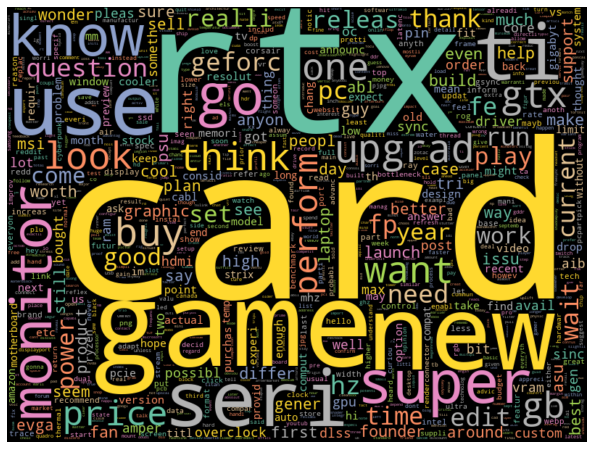

In [251]:
# Import package
plot_wordcloud('nvidia','Most commonn words in Nvidia')

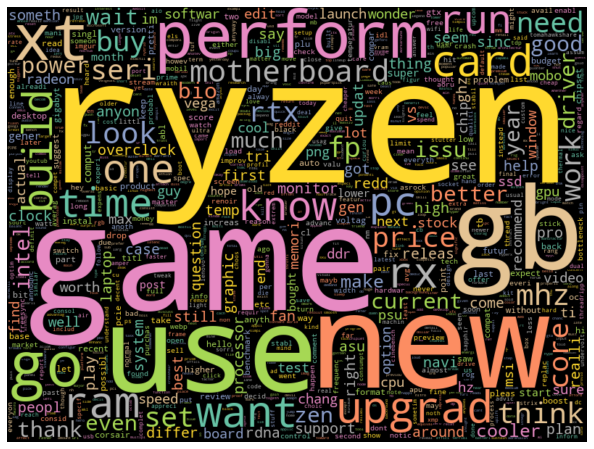

In [252]:
# Import package
plot_wordcloud('Amd','Most commonn words in Amd')

#### Observation :

- Wordclouds are great at providing quick snapshots of the top words appearing in each subreddit. However, we can't exactly quantify how frequently these words are appearing.
- We will use CountVectorizer to tokenise our textual data and plot a barplot to visualise the top 20 most frequently occuring words for each subreddit.

In [253]:
# Write a function to tokenise the cleaned text and plot a barplot of the top 20 most frequently occuring words

def barplot_cvec(subreddit, title, color):
    words_series = df[df['subreddit']==subreddit]['selftext_title_clean']
    
    # Instantiate CountVectorizer 
    cvec = CountVectorizer(stop_words='english')
    
    # Save the tokens in a dataframe
    cvec_df = pd.DataFrame(cvec.fit_transform(words_series).todense(), columns=cvec.get_feature_names())
    sum_words = cvec_df.sum(axis=0) # Sum up the no. of occurences for each word
    top_words = sum_words.sort_values(ascending=False).head(20)
    
    top_words.sort_values(ascending=True).plot(kind='barh', figsize=(10,8), color=color)
    plt.title(title, fontsize=12, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.xlim(0,1400) # Setting a limit so that the barplots are comparable between both subreddit

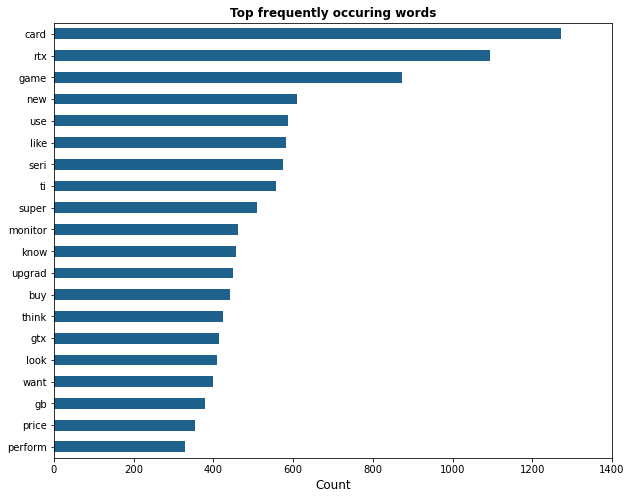

In [254]:
barplot_cvec('nvidia', 'Top frequently occuring words', '#1F618D')

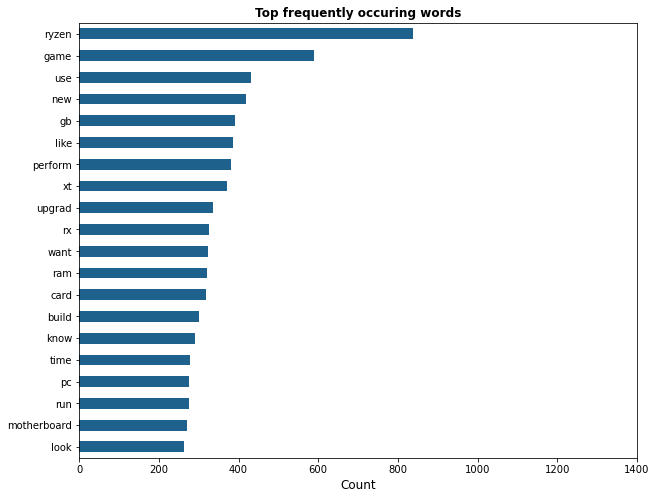

In [255]:
barplot_cvec('Amd', 'Top frequently occuring words', '#1F618D')

#### Observation 
The words 'use', 'new' and 'game' are the top frequently occuring words on both subreddits. As these words are frequently seen in both subreddits, these words may not be important in helping us classify between Nvidia and Amd.
- 'ryzen' and 'xt' and 'rx'(belongs to AMD cpu,gpu and video card) more frequently appearing  in Amd 
-  'gtx' and 'rtx', 'ti' (belongs to gpu card) are more frequently in appearing in Nvidia

In [256]:
# Find the no. of meaningful words in each post 
df['selftext_len'] = df['selftext_title_clean'].str.split().apply(len)
df.head(5)

,subreddit,selftext,title,num_comments,selftext_clean,title_clean,selftext_title_clean,selftext_len
0,nvidia,# [This thread is best viewed on New Reddit platform](https://new.reddit.com/r/nvidia/comments/ijbal9/read_me_first_event_protocol_for_rnvidia/).\n\n# The Ultimate Countdown is drawing to an end a...,"Read Me First - Event Protocol for r/NVIDIA Community - September 1st, 2020",273,thread best view new reddit platform new reddit r comment ijbal read first event protocol rnvidia ultim countdown draw end like detail commun tuesday event ultim countdown preview redd bi rc e h k...,read first event protocol r commun septemb st,thread best view new reddit platform new reddit r comment ijbal read first event protocol rnvidia ultim countdown draw end like detail commun tuesday event ultim countdown preview redd bi rc e h k...,240
1,nvidia,This is my first time following along with the launch of a new generation of graphics cards. All the leaks and rumors have been exciting to follow along with. I blocked off my calendar at work dur...,One More Day! Who’s hyped?!,566,first time follow along launch new gener graphic card leak rumor excit follow along block calendar work present practic f mash hope everyon fun tomorrow,one day hype,first time follow along launch new gener graphic card leak rumor excit follow along block calendar work present practic f mash hope everyon fun tomorrow one day hype,28
2,nvidia,"I plan to get a 3080 tomorrow assuming I can pre order it of coarse. I'm just not sure what benfits there are to getting a card from someone like Asus, MSI, or EVGA? And which of those would you r...",Why get a non founders or reference card?,105,plan get tomorrow assum pre order coars sure benfit get card someon like asu msi evga would recommend spec k gb ram mhz w psu aoru pro wifi z mb liter put thing togeth last friday wait new card,get non founder refer card,plan get tomorrow assum pre order coars sure benfit get card someon like asu msi evga would recommend spec k gb ram mhz w psu aoru pro wifi z mb liter put thing togeth last friday wait new card ge...,44
3,nvidia,I’m hoping to get an EVGA 3090 tomorrow but not sure where I should be F5ing for best results. Any thoughts?,"If AIB cards launch tomorrow as predicted, do you have to buy them from the manufacturer website or do they show up on places like Amazon/Best Buy/Newegg?",121,hope get evga tomorrow sure f ing best result thought,aib card launch tomorrow predict buy manufactur websit show place like amazon best buy newegg,hope get evga tomorrow sure f ing best result thought aib card launch tomorrow predict buy manufactur websit show place like amazon best buy newegg,25
4,nvidia,"I’m curious as I can’t really decide myself. Loving my 1080ti Strix, so might go team ASUS again despite its kind of ugly ”gamer look” :) How about you guys\n\nEDIT: Wow, thanks for all the answer...",Which 3000 series card manufacturer are you going to choose?,270,curiou realli decid love ti strix might go team asu despit kind ugli gamer look guy edit wow thank answer fun read even confus hah edit damn mani evga fan,seri card manufactur go choos,curiou realli decid love ti strix might go team asu despit kind ugli gamer look guy edit wow thank answer fun read even confus hah edit damn mani evga fan seri card manufactur go choos,35


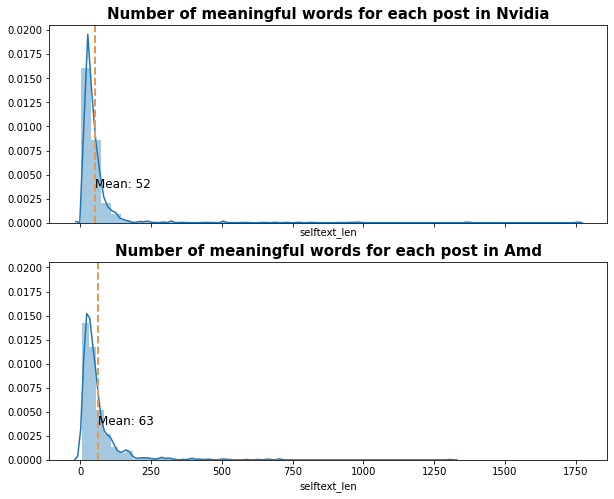

In [257]:
fig,ax = plt.subplots(2, 1, figsize=(10,8), sharex=True, sharey=True)

# Plots the distribution of post length for Nvidia 
nvidia_len = df[df['subreddit']=='nvidia']['selftext_len']
sns.distplot(nvidia_len, ax=ax[0])
ax[0].axvline(nvidia_len.mean(), linestyle='dashed', linewidth=2, c='#EB984E') # To plot the mean line
ax[0].text(x=nvidia_len.mean(), 
           y=0.004, 
           s=f'Mean: {round(nvidia_len.mean())}', 
           horizontalalignment='left', 
           verticalalignment='center',
          fontsize=12)
ax[0].set_title('Number of meaningful words for each post in Nvidia', fontsize=15, fontweight='bold')

# Plots the distribution of post length for Amd
Amd_len = df[df['subreddit']=='Amd']['selftext_len']
sns.distplot(Amd_len, ax=ax[1])
ax[1].axvline(Amd_len.mean(), linestyle='dashed', linewidth=2, c='#EB984E') # To plot the mean line
ax[1].text(x=Amd_len.mean(), 
           y=0.004, 
           s=f'Mean: {round(Amd_len.mean())}', 
           horizontalalignment='left', 
            verticalalignment ='center',
            fontsize=12)
ax[1].set_title('Number of meaningful words for each post in Amd', fontsize=15, fontweight='bold');

#### Observation:
The distribution of number of meanigful workds are right-skewed. We can say that average meaningful words in each post <200. The average number of meaningful words in a Nvidia is 52 whereas AMD is around 63 words.

##  Combined Dataframe

In [258]:
# Keep only columns that will be useful for modelling and evaluation
df = df[['subreddit','selftext','title','selftext_title_clean']]

In [259]:
# Check that we only have these 4 columns in our final dataframe
df.head()

,subreddit,selftext,title,selftext_title_clean
0,nvidia,# [This thread is best viewed on New Reddit platform](https://new.reddit.com/r/nvidia/comments/ijbal9/read_me_first_event_protocol_for_rnvidia/).\n\n# The Ultimate Countdown is drawing to an end a...,"Read Me First - Event Protocol for r/NVIDIA Community - September 1st, 2020",thread best view new reddit platform new reddit r comment ijbal read first event protocol rnvidia ultim countdown draw end like detail commun tuesday event ultim countdown preview redd bi rc e h k...
1,nvidia,This is my first time following along with the launch of a new generation of graphics cards. All the leaks and rumors have been exciting to follow along with. I blocked off my calendar at work dur...,One More Day! Who’s hyped?!,first time follow along launch new gener graphic card leak rumor excit follow along block calendar work present practic f mash hope everyon fun tomorrow one day hype
2,nvidia,"I plan to get a 3080 tomorrow assuming I can pre order it of coarse. I'm just not sure what benfits there are to getting a card from someone like Asus, MSI, or EVGA? And which of those would you r...",Why get a non founders or reference card?,plan get tomorrow assum pre order coars sure benfit get card someon like asu msi evga would recommend spec k gb ram mhz w psu aoru pro wifi z mb liter put thing togeth last friday wait new card ge...
3,nvidia,I’m hoping to get an EVGA 3090 tomorrow but not sure where I should be F5ing for best results. Any thoughts?,"If AIB cards launch tomorrow as predicted, do you have to buy them from the manufacturer website or do they show up on places like Amazon/Best Buy/Newegg?",hope get evga tomorrow sure f ing best result thought aib card launch tomorrow predict buy manufactur websit show place like amazon best buy newegg
4,nvidia,"I’m curious as I can’t really decide myself. Loving my 1080ti Strix, so might go team ASUS again despite its kind of ugly ”gamer look” :) How about you guys\n\nEDIT: Wow, thanks for all the answer...",Which 3000 series card manufacturer are you going to choose?,curiou realli decid love ti strix might go team asu despit kind ugli gamer look guy edit wow thank answer fun read even confus hah edit damn mani evga fan seri card manufactur go choos


In [260]:
# View the shape of our dataframe
df.shape

(2590, 4)

In [261]:
# Check that there is no missing data as the feature columns will be used for modelling
df.isnull().sum()

subreddit               0
selftext                0
title                   0
selftext_title_clean    0
dtype: int64

In [262]:
# Save our cleaned and combined dataframe into a csv file for modelling
df.to_csv('./datasets/combined.csv', index=False)